In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("sensor_data.csv")
df['Boiler Name'].value_counts()

Boiler Name
Boiler C    284
Boiler D    263
Boiler A    233
Boiler B    220
Name: count, dtype: int64

In [3]:
le=LabelEncoder()
df["Boiler Name"]=le.fit_transform(df["Boiler Name"])
df.info()
df['Timestamp']
df['Boiler Name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Boiler Name  1000 non-null   int32  
 2   Temperature  1000 non-null   float64
 3   Anomaly      1000 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 27.5+ KB


Boiler Name
2    284
3    263
0    233
1    220
Name: count, dtype: int64

In [4]:
import datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='%d-%m-%Y %H:%M')
df['Timestamp']=df['Timestamp'].map(datetime.datetime.toordinal)
df['Timestamp']=df['Timestamp'].astype(int)
df['Timestamp']

0      738543
1      738550
2      738523
3      738523
4      738524
        ...  
995    738531
996    738545
997    738522
998    738527
999    738521
Name: Timestamp, Length: 1000, dtype: int32

{'whiskers': [<matplotlib.lines.Line2D at 0x21f0324b0e0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f0324b680>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f7fe1dee0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f0324bce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f03280050>],
 'means': []}

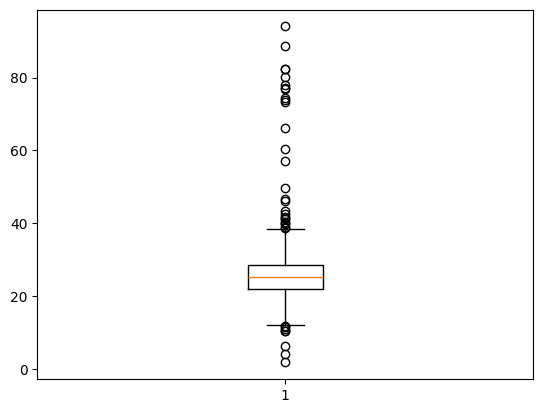

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(df['Temperature'])

In [ ]:
from scipy.stats import skew
df=df[df['Temperature']>20]
df=df[df['Temperature']<30]
#plt.boxplot(df['Temperature'])
print(skew(df['Temperature']))
plt.boxplot(df['Temperature'])

Anomaly
0    976
1    976
Name: count, dtype: int64


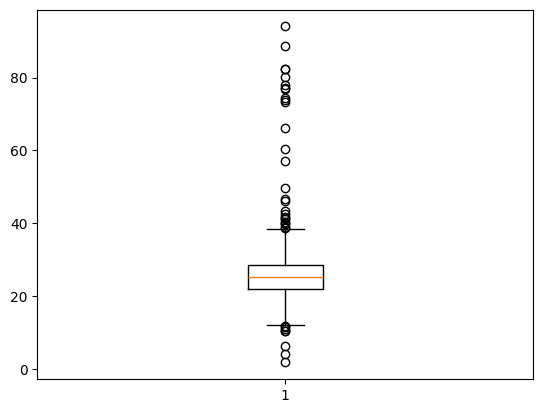

In [6]:
from imblearn.over_sampling import KMeansSMOTE
kmeans1=KMeansSMOTE()
x,y=kmeans1.fit_resample(df,df['Anomaly'])
print(y.value_counts())
plt.boxplot(df['Temperature'])
df=x


In [7]:
x=x.iloc[:,[1,2,3]].values
#df=x

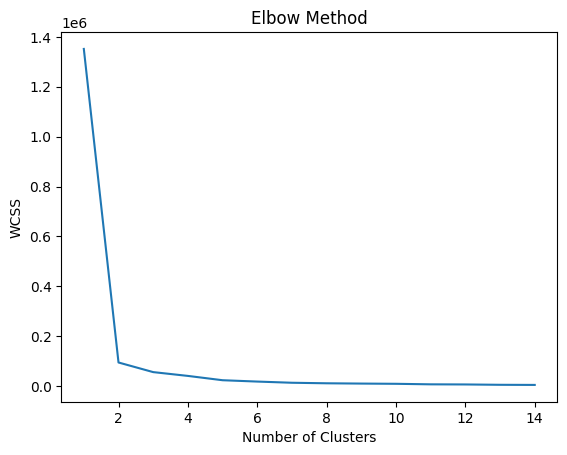

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [9]:
kmeans=KMeans(n_clusters=4,random_state=0)
ymeans=kmeans.fit_predict(x[:,[0,1,2]])
df['clusters']=ymeans

In [10]:
print(df.head())

   Timestamp  Boiler Name  Temperature  Anomaly  clusters
0     738543            0    20.180428        0         1
1     738550            0    23.372948        0         1
2     738523            0    29.858208        0         1
3     738523            2    20.564032        0         1
4     738524            3    23.547024        0         1


<Axes: xlabel='Temperature', ylabel='Anomaly'>

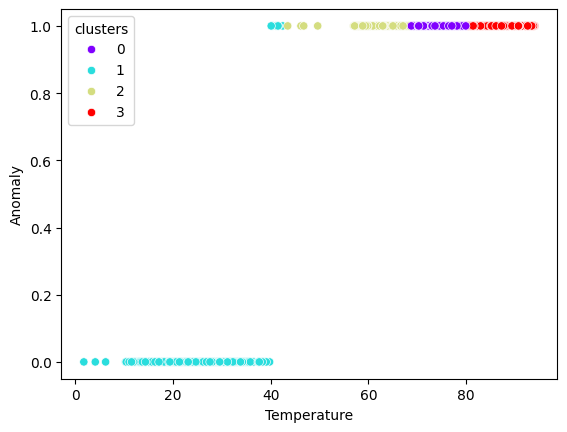

In [11]:
import seaborn as sns
sns.scatterplot(x="Temperature",y="Anomaly",hue="clusters",data=df,palette="rainbow")

<Axes: xlabel='Boiler Name', ylabel='Temperature'>

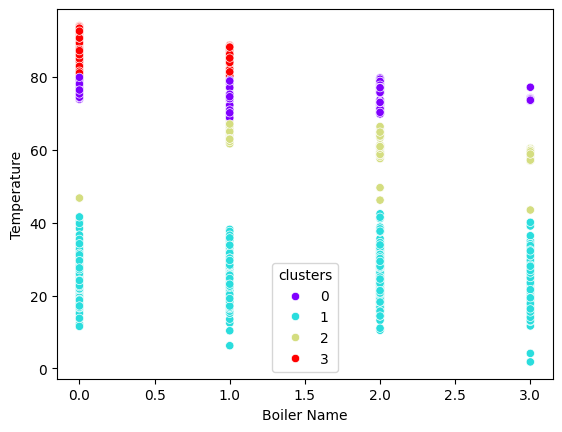

In [12]:
sns.scatterplot(x="Boiler Name",y="Temperature",hue="clusters",data=df,palette="rainbow")

In [ ]:
labels=kmeans.labels_
labels

In [ ]:
cento=kmeans.cluster_centers_
cento

In [ ]:
plt.scatter(x[ymeans==0,0],x[ymeans==0,2],s=100,c='red',label='cluster1')
plt.scatter(x[ymeans==1,0],x[ymeans==1,2],s=100,c='blue',label='cluster2')
plt.scatter(x[ymeans==2,0],x[ymeans==2,2],s=100,c='green',label='cluster3')
plt.scatter(x[ymeans==3,0],x[ymeans==3,2],s=100,c='cyan',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ymeans)

In [ ]:
x[ymeans==0,0]

In [ ]:
x[ymeans==0,1]

In [16]:
t=20.18042818
b="A"
a=0
if b=="A":
    b1=0
elif b=="B":
    b1=1
elif b=="C":
    b1=2
elif b=="D":
    b1=3
y1=kmeans.predict([[b1,t,a]])

y1[0]
if y1[0]==1:
    print("Cluster 1")

Cluster 1
